In [1]:
import sys
import numpy as np
import pandas as pd

sys.path.insert(0, '..')
from scripts import sanity_check

### load data

In [2]:
beneficiary_data = pd.read_csv('../../data/Train_Beneficiarydata-1542865627584.csv')
beneficiary_data.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [3]:
checker = sanity_check.SanityCheck(beneficiary_data)

***measurement levels***

- numerical

In [4]:
num = checker.measurement_level()['numerical']

In [5]:
beneficiary_data[num].head().T

,0,1,2,3,4
Gender,1,2,1,1,1
Race,1,1,1,1,1
State,39,39,52,39,24
County,230,280,590,270,680
NoOfMonths_PartACov,12,12,12,12,12
NoOfMonths_PartBCov,12,12,12,12,12
ChronicCond_Alzheimer,1,2,1,1,2
ChronicCond_Heartfailure,2,2,2,1,2
ChronicCond_KidneyDisease,1,2,2,2,2
ChronicCond_Cancer,2,2,2,2,2


- categorical

In [6]:
cat = checker.measurement_level()['categorical']

In [7]:
beneficiary_data[cat].head().T

,0,1,2,3,4
BeneID,BENE11001,BENE11002,BENE11003,BENE11004,BENE11005
DOB,1943-01-01,1936-09-01,1936-08-01,1922-07-01,1935-09-01
DOD,NaN,NaN,NaN,NaN,NaN
RenalDiseaseIndicator,0,0,0,0,0


In [8]:
checker.date_columns(columns=['DOB', 'DOD'],
                     format='%Y-%m-%d')

***missing data***

In [9]:
checker.missing_data()

total missing count:137135 (3.9589768757758597%)
total rows: 138556
total columns: 25
---------------------------------------------------------------------------


BeneID                              0.000000
DOB                                 0.000000
DOD                                98.974422
Gender                              0.000000
Race                                0.000000
RenalDiseaseIndicator               0.000000
State                               0.000000
County                              0.000000
NoOfMonths_PartACov                 0.000000
NoOfMonths_PartBCov                 0.000000
ChronicCond_Alzheimer               0.000000
ChronicCond_Heartfailure            0.000000
ChronicCond_KidneyDisease           0.000000
ChronicCond_Cancer                  0.000000
ChronicCond_ObstrPulmonary          0.000000
ChronicCond_Depression              0.000000
ChronicCond_Diabetes                0.000000
ChronicCond_IschemicHeart           0.000000
ChronicCond_Osteoporasis            0.000000
ChronicCond_rheumatoidarthritis     0.000000
ChronicCond_stroke                  0.000000
IPAnnualReimbursementAmt            0.000000
IPAnnualDe

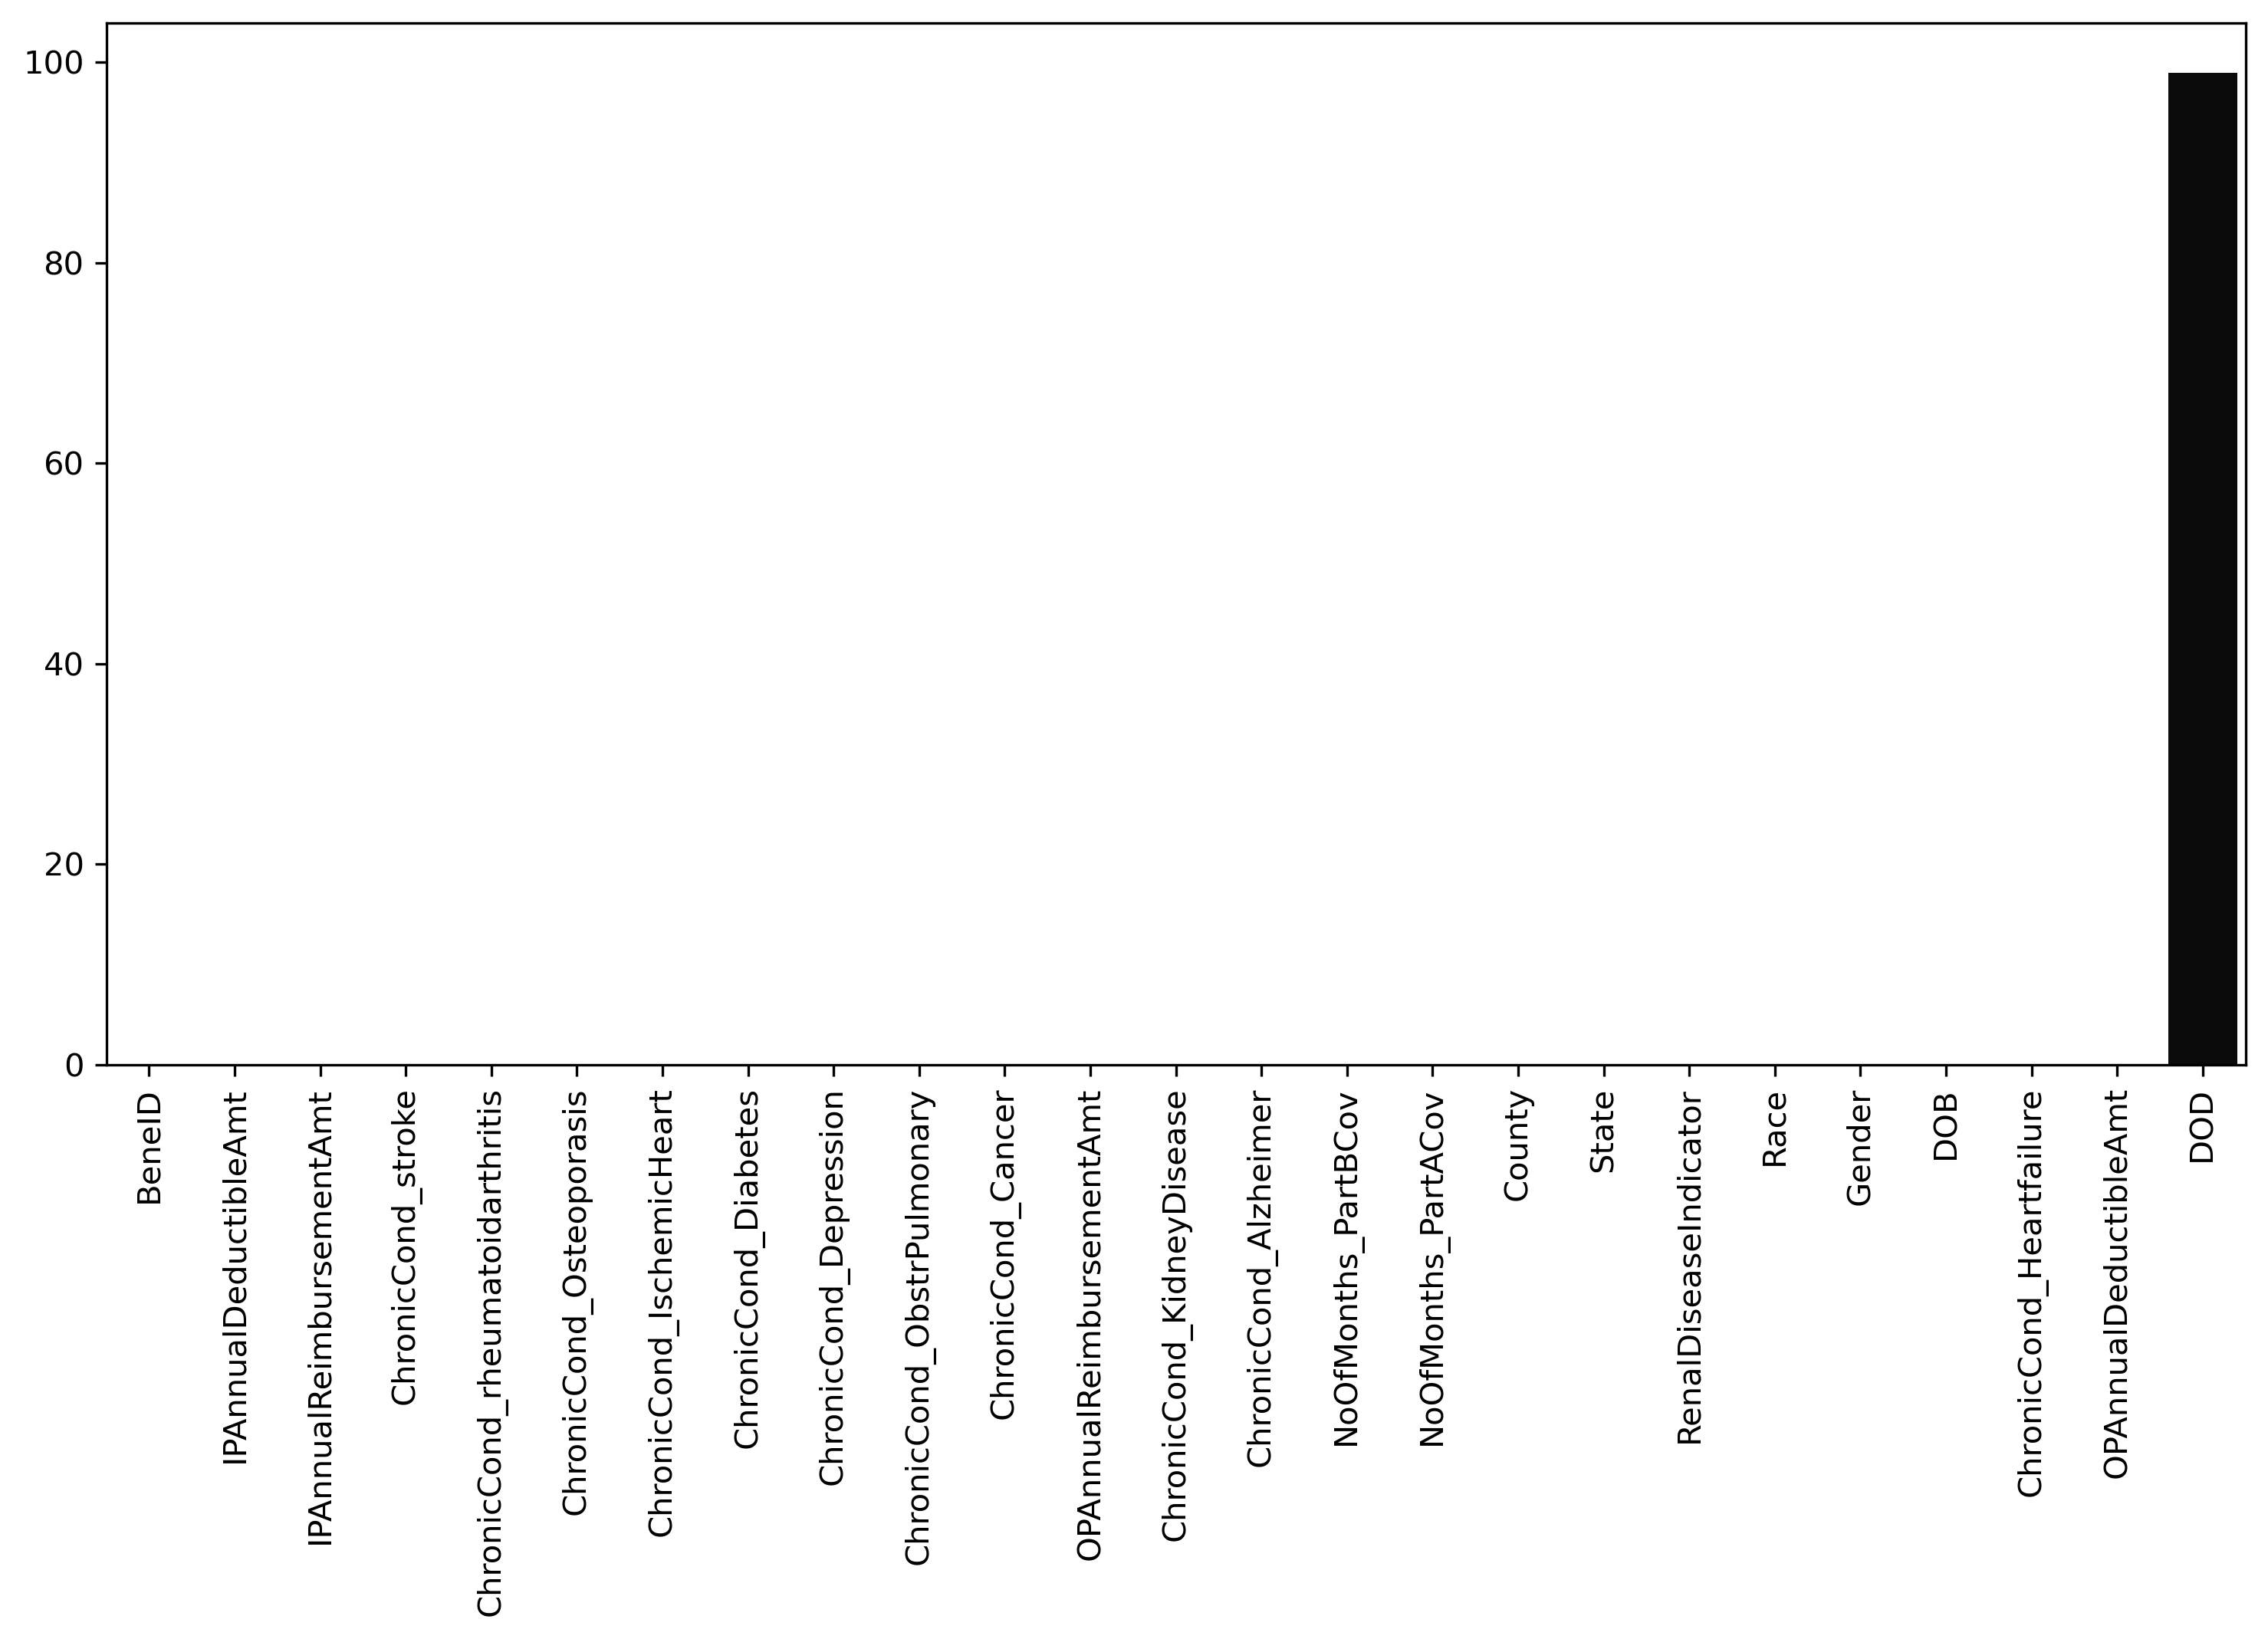

In [10]:
checker.render_case_missing_matrix(axis=0)

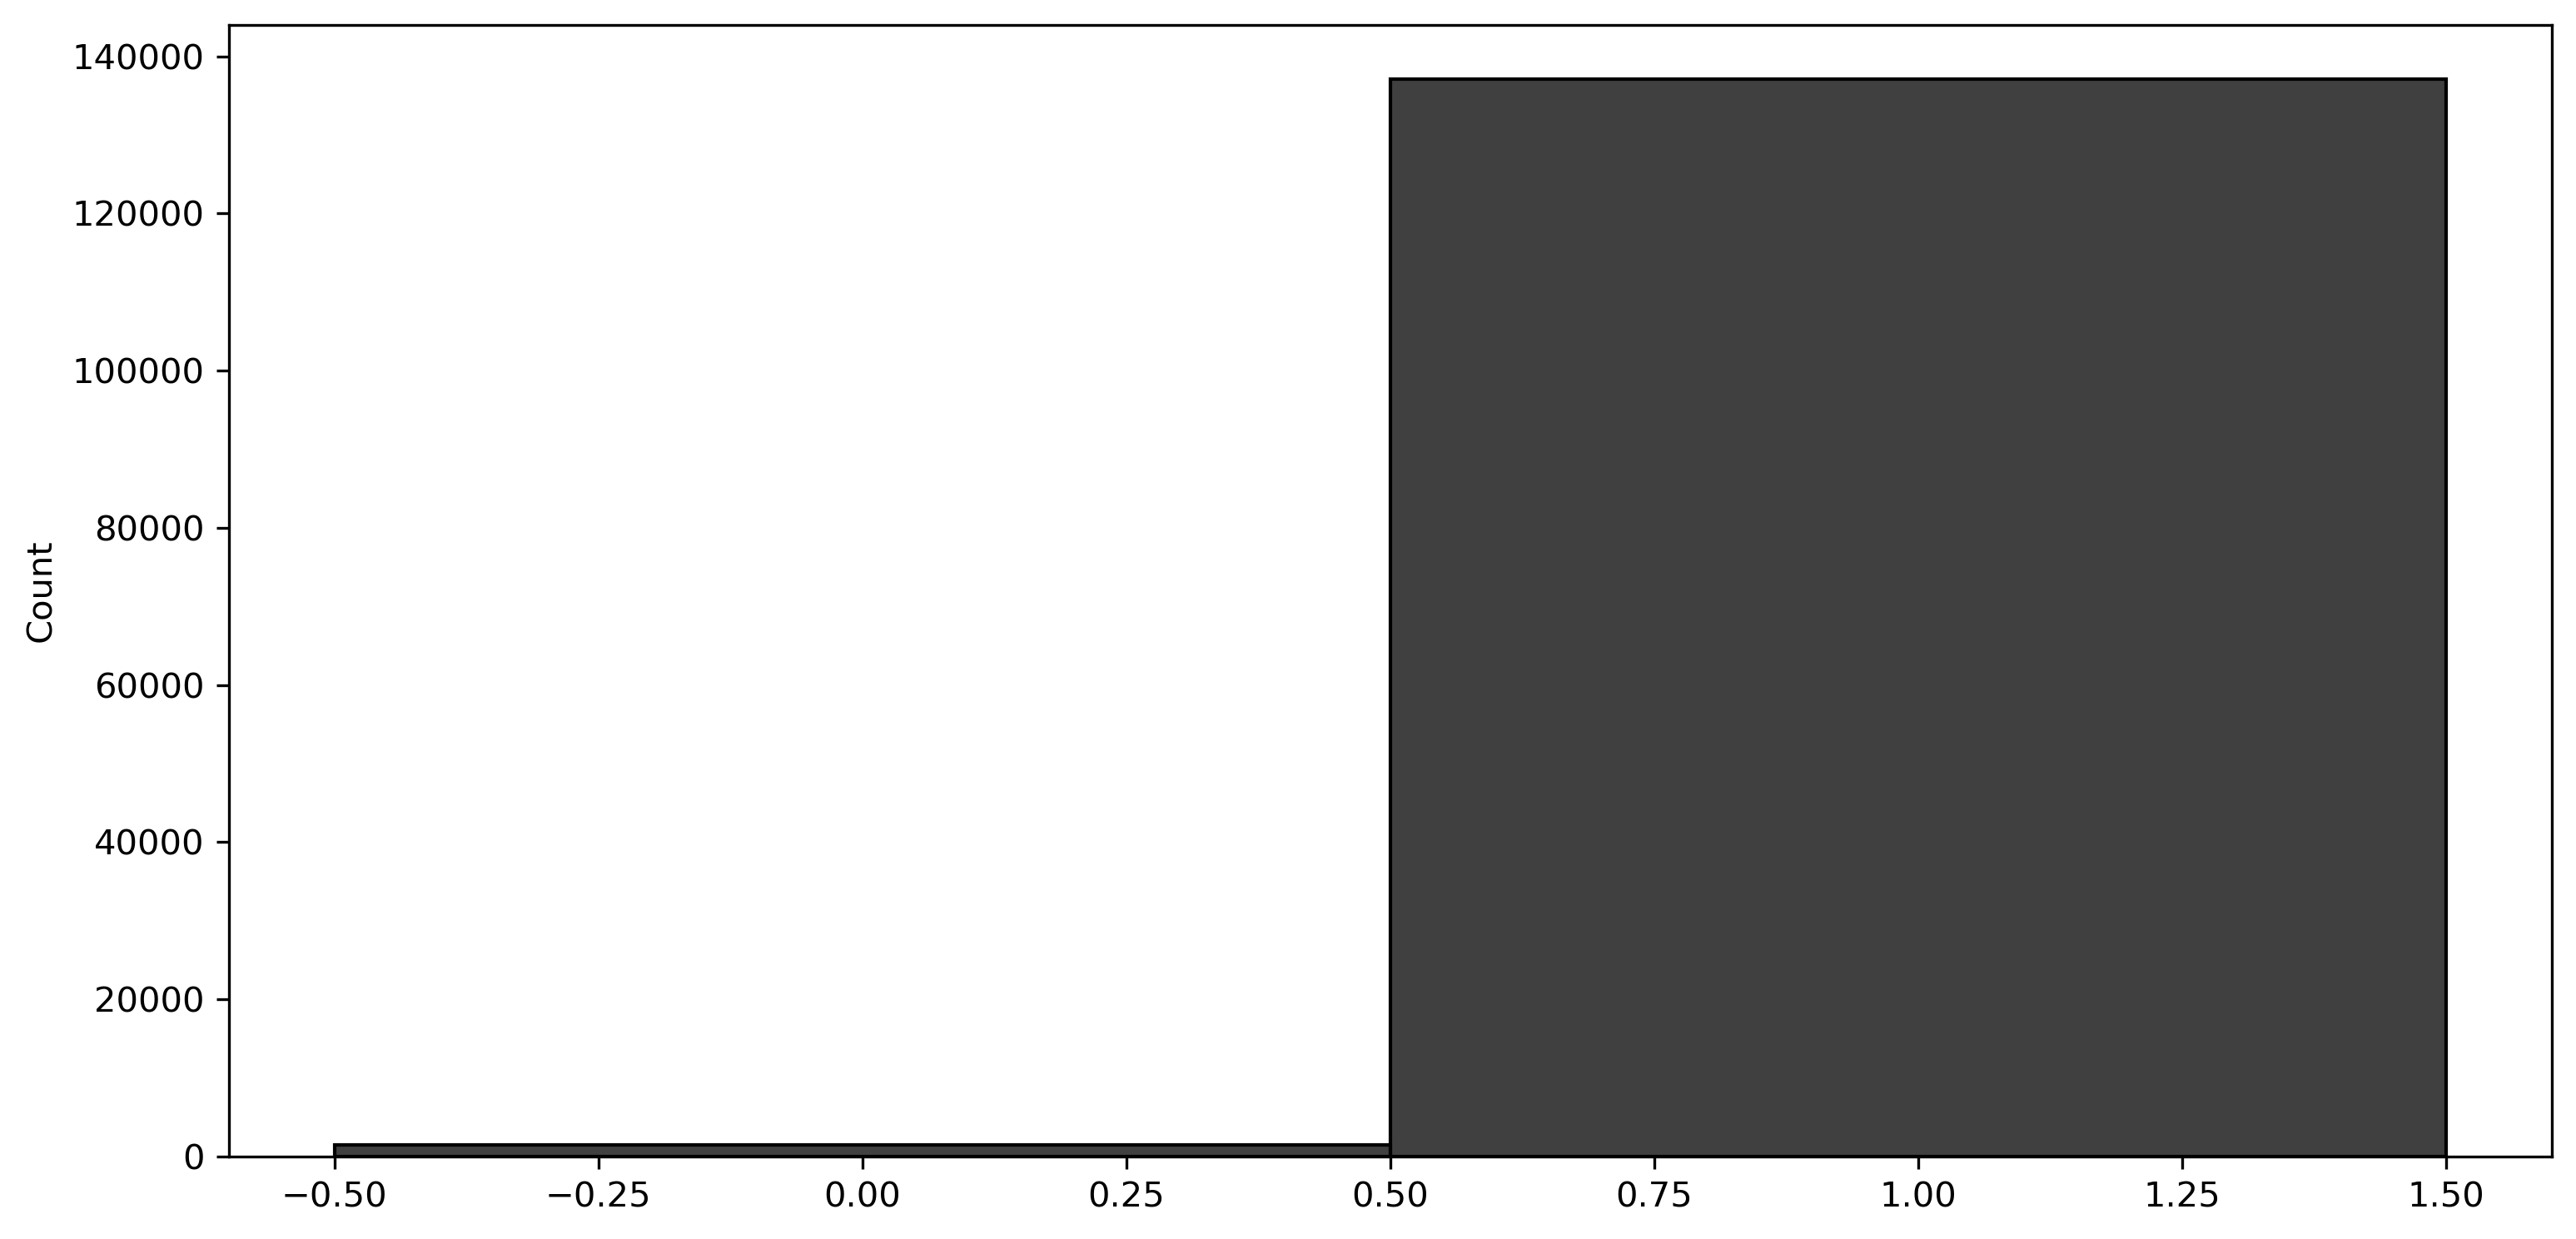

In [11]:
checker.render_case_missing_matrix(axis=1)

<Figure size 3600x1800 with 0 Axes>

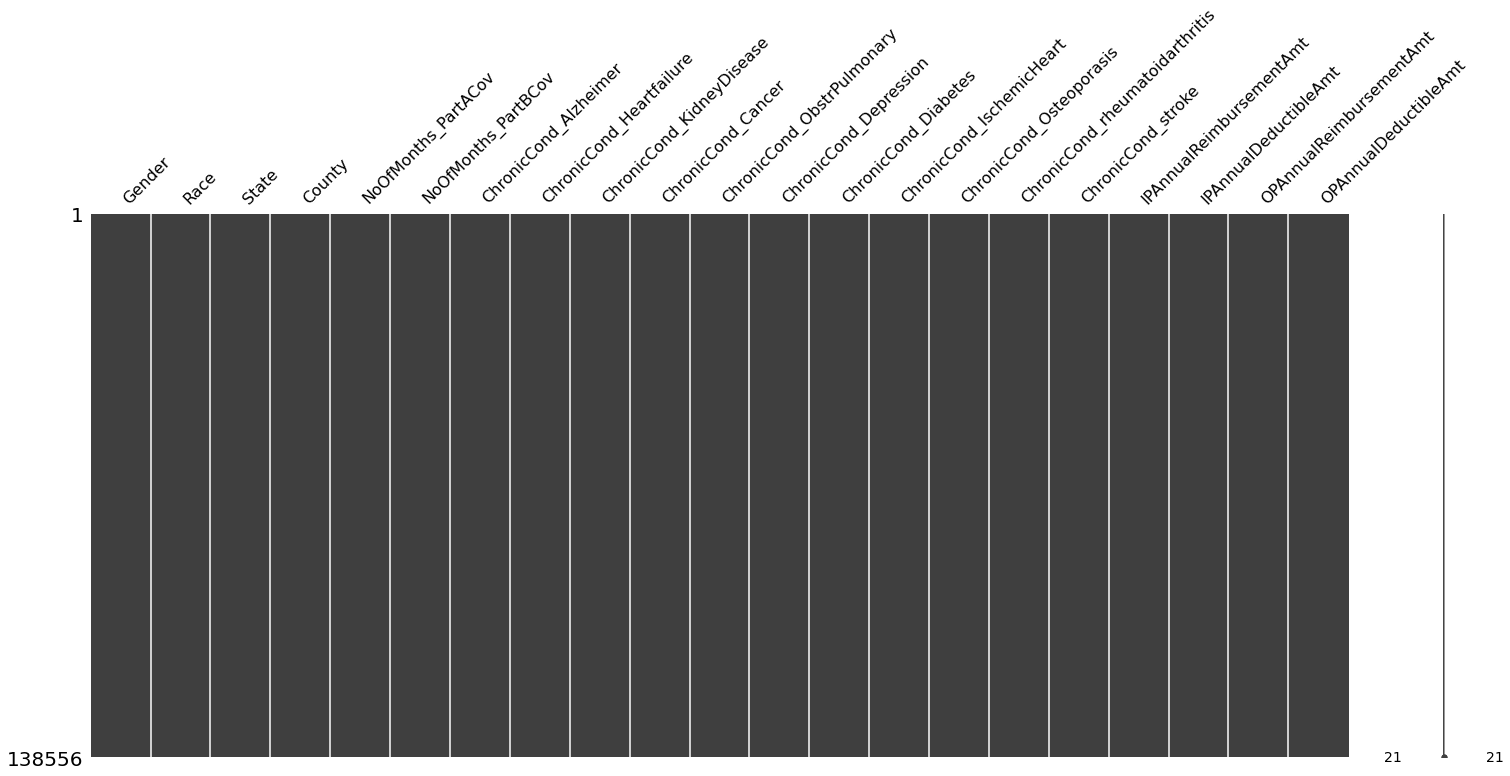

In [12]:
checker.render_missing_matrix(num)

<Figure size 3600x1800 with 0 Axes>

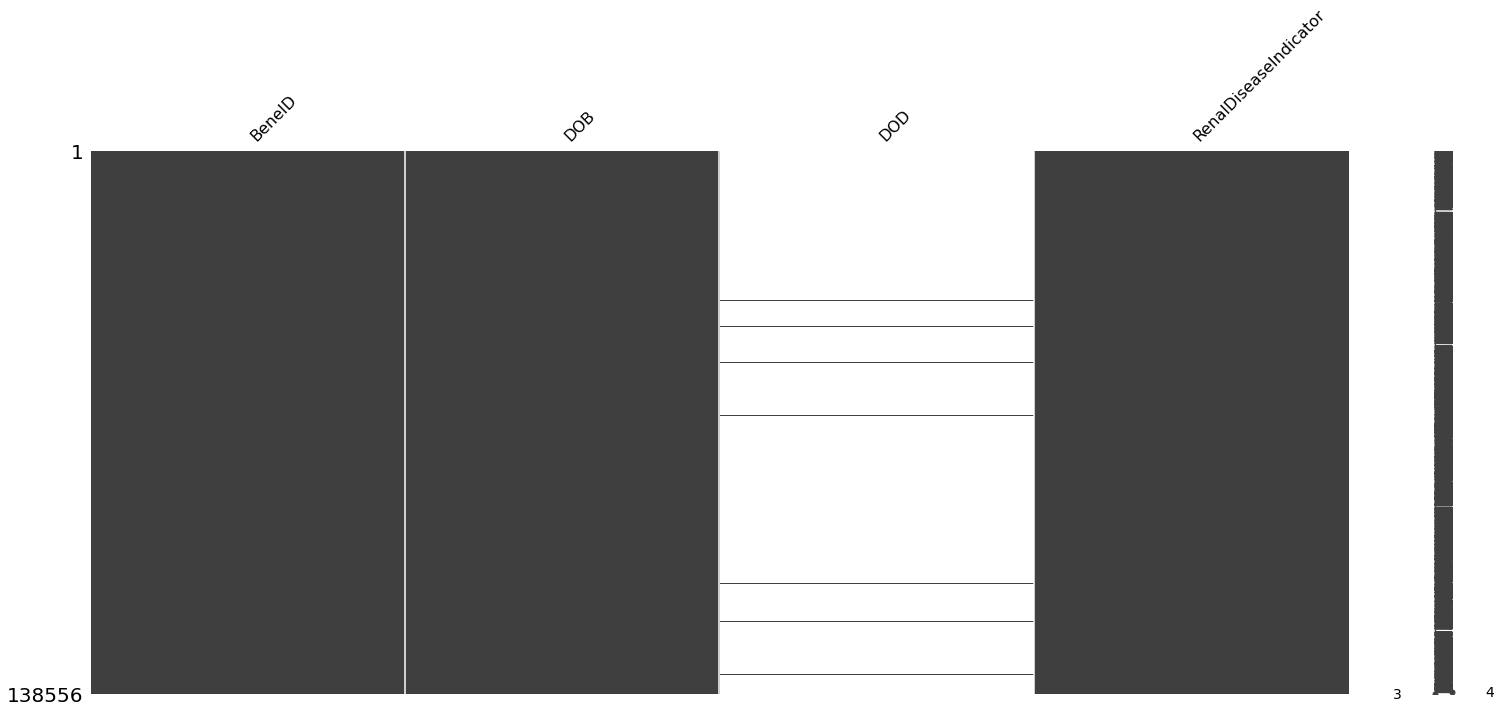

In [13]:
checker.render_missing_matrix(cat)
